In [ ]:

import numpy as np
import pandas as pd
import imageio
import cv2
def get_train_data():
  train_data = pd.DataFrame({"pixel_data": [], "image_id": [], "bug_type": [], "count":[], "original_shape":[]})
  for number, line in enumerate(open('./drive/MyDrive/AML_final_project/Train_bugs.csv')):
    if number == 0:
      continue
    # if number == 20:
    #   break
    try:
      im = imageio.imread("./drive/MyDrive/AML_final_project/aml_bug_train_images"+line.strip().split(",")[0])
      train_data.loc[len(train_data.index)] = [im, line.strip().split(",")[0], line.strip().split(",")[1], line.strip().split(",")[2], im.shape]
      # print(cv2.resize(im, (500,500),  interpolation = cv2.INTER_AREA).shape)
      # break
    except Exception as e:
      continue
  train_data_abw  = train_data[(train_data["bug_type"]=='abw')]
  train_data_abw = pd.concat([train_data_abw, train_data[~train_data["image_id"].isin(train_data_abw["image_id"])]])
  train_data_abw.loc[train_data_abw["bug_type"]=='pbw',"count"] = 0
  train_data_abw.drop('bug_type', inplace = True, axis = 1)

  train_data_pbw  = train_data[(train_data["bug_type"]=='pbw') ]
  train_data_pbw = pd.concat([train_data_pbw, train_data[~train_data["image_id"].isin(train_data_pbw["image_id"])]])
  train_data_pbw.loc[train_data_pbw["bug_type"]=='abw',"count"] = 0
  train_data_pbw.drop('bug_type', inplace = True, axis = 1) 
  return train_data_abw, train_data_pbw

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
train_data_abw, train_data_pbw, = get_train_data()


In [ ]:
train_data_abw['image_id'] = train_data_abw['image_id'].astype(str)
train_data_pbw['image_id'] = train_data_pbw['image_id'].astype(str)
x = train_data_abw.merge(train_data_pbw,on = "image_id", how = "inner")


In [ ]:
train_data_pbw.shape

(0, 4)

In [ ]:
x.shape

(0, 7)

# Initial Analysis

The Image dataset provided is highly unstructured. As seen below, the images are of different resolutions and the distance between the camera and the subject varies, providing different zoomed in photos of the bugs. Furthermore, the size of the entire training dataset is around 27 GB, posing further challenges with memory constraints when training this data.

In [ ]:
from matplotlib import pylab as plt
from matplotlib.patches import Polygon
import gc
%matplotlib inline
bboxes = pd.read_csv("./drive/MyDrive/AML_final_project/images_bboxes.csv")
for i in range(10):
  x = train_data_abw.iloc[i]['pixel_data']
  plt.imshow(x)
  bb = bboxes[bboxes["image_id"]==train_data_abw.iloc[i]['image_id']]
  for j in range(bb.shape[0]):
    # print(list(map(lambda x: [float(tuple(x)[0]), float(tuple(x)[2])], bb.iloc[j]["geometry"].split(" ")[1].strip("()").split(","))))
    plt.gca().add_patch(Polygon(
        list(map(lambda x: [float(x.strip(" ").split(" ")[0]), float(x.strip(" ").split(" ")[1])], bb.iloc[j]["geometry"].split("POLYGON ")[1].strip("()").split(","))),
        edgecolor=(1, 0, 0, .25),
        facecolor=(1, 0, 0, .25),
        linewidth=0))
  plt.show()
del bboxes
gc.collect()

IndexError: ignored

In [ ]:
x.shape

(0, 7)

In [ ]:
# import required packages
import cv2
import argparse
import numpy as np

# handle command line arguments
ap = argparse.ArgumentParser()
ap.add_argument('-i', '--image', required=True,
                help = 'path to input image')
ap.add_argument('-c', '--config', required=True,
                help = 'path to yolo config file')
ap.add_argument('-w', '--weights', required=True,
                help = 'path to yolo pre-trained weights')
ap.add_argument('-cl', '--classes', required=True,
                help = 'path to text file containing class names')
args = ap.parse_args()

usage: ipykernel_launcher.py [-h] -i IMAGE -c CONFIG -w WEIGHTS -cl CLASSES
ipykernel_launcher.py: error: the following arguments are required: -i/--image, -c/--config, -w/--weights, -cl/--classes


SystemExit: ignored

In [ ]:
! git clone https://github.com/tzutalin/labelImg.git

Cloning into 'labelImg'...
remote: Enumerating objects: 2097, done.
remote: Counting objects: 100% (7/7), done.
remote: Compressing objects: 100% (7/7), done.
remote: Total 2097 (delta 0), reused 4 (delta 0), pack-reused 2090
Receiving objects: 100% (2097/2097), 237.14 MiB | 43.60 MiB/s, done.
Resolving deltas: 100% (1242/1242), done.


In [ ]:
pip install labelImg

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 247 kB 5.2 MB/s 
     |████████████████████████████████| 8.4 MB 53.3 MB/s 
     |████████████████████████████████| 59.9 MB 87 kB/s 
     |████████████████████████████████| 361 kB 52.1 MB/s 
  Created wheel for labelImg: filename=labelImg-1.8.6-py2.py3-none-any.whl size=261540 sha256=5e3fd035e48ef5d28149883cfd14382fc4c79d0715a54bafd5bd993d448d37ae
  Stored in directory: /root/.cache/pip/wheels/c3/9e/49/8368f5bc5347b5e54aef95b7b03ec56af7e23ea4c16c82109c
Successfully built labelImg


In [ ]:
pip install PyQt5


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!wget https://pjreddie.com/media/files/yolov3.weights

--2022-12-05 22:38:38--  https://pjreddie.com/media/files/yolov3.weights
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 248007048 (237M) [application/octet-stream]
Saving to: ‘yolov3.weights’

yolov3.weights      100%[===================>] 236.52M  38.3MB/s    in 6.6s    

2022-12-05 22:38:45 (36.1 MB/s) - ‘yolov3.weights’ saved [248007048/248007048]



In [ ]:
import cv2
import argparse
import numpy as np

# handle command line arguments
ap = argparse.ArgumentParser()
ap.add_argument('-i', '--image', required=True,
                help = 'path to input image')
ap.add_argument('-c', '--config', required=True,
                help = 'path to yolo config file')
ap.add_argument('-w', '--weights', required=True,
                help = 'path to yolo pre-trained weights')
ap.add_argument('-cl', '--classes', required=True,
                help = 'path to text file containing class names')
args = ap.parse_args()

usage: ipykernel_launcher.py [-h] -i IMAGE -c CONFIG -w WEIGHTS -cl CLASSES
ipykernel_launcher.py: error: the following arguments are required: -i/--image, -c/--config, -w/--weights, -cl/--classes


SystemExit: ignored

In [ ]:
! python yolo_opencv.py --image dog.jpg --config yolov3.cfg --weights

python3: can't open file 'yolo_opencv.py': [Errno 2] No such file or directory


In [ ]:
import os

# Construct the absolute path to the aml_training folder
aml_training_folder_path = "/Users/joshuamisir/Desktop/aml_training"

# Replace <username> with your actual username

# Create an empty list to store the images
images = []

# Loop through the files in the aml_training folder
for filename in os.listdir(aml_training_folder_path):
    # Check if the file is an image in JPG format
    if filename.endswith(".jpg"):
        # Construct the full path to the image file
        file_path = os.path.join(aml_training_folder_path, filename)

        # Read the image file into memory
        with open(file_path, "rb") as f:
            image_data = f.read()

        # Add the image data to the list
        images.append(image_data)

# Print the number of images in the list
print(f"Found {len(images)} images in the aml_training folder.")

FileNotFoundError: ignored

In [ ]:
import os

# Construct the absolute path to the aml_training folder
aml_training_folder_path = "/Users/joshuamisir/Desktop/aml_training"

# Replace <username> with your actual username

# Check if the path to the aml_training folder exists
if not os.path.exists(aml_training_folder_path):
    # Print an error message if the path does not exist
    print("The aml_training folder does not exist at the specified path.")
else:
    # Create an empty list to store the images
    images = []

    # Loop through the files in the aml_training folder
    for filename in os.listdir(aml_training_folder_path):
        # Check if the file is an image in JPG format
        if filename.endswith(".jpg"):
            # Construct the full path to the image file
            file_path = os.path.join(aml_training_folder_path, filename)

            # Read the image file into memory
            with open(file_path, "rb") as f:
                image_data = f.read()

            # Add the image data to the list
            images.append(image_data)

    # Print the number of images in the list
    print(f"Found {len(images)} images in the aml_training folder.")

The aml_training folder does not exist at the specified path.


In [ ]:
!pip install opencv-python

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import cv2 
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
image = cv2.imread("./id_0a1fb0a40f0a11cd4fb19dd6.jpg")

In [ ]:
type(image)

numpy.ndarray

In [ ]:
image.shape

(3120, 4160, 3)

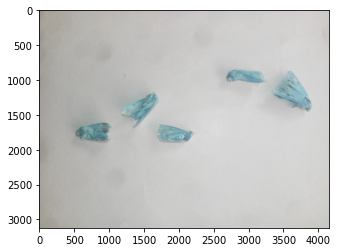

In [ ]:
plt.imshow(image)

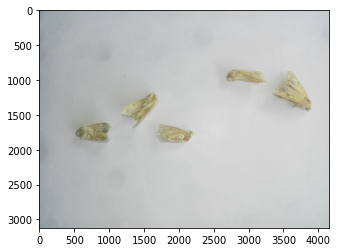

In [ ]:
new_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(new_image)

In [ ]:
'''
1. Splitting image channels 

'''

r,g,b = cv2.split(new_image)

print('r', r.shape)
print('g', g.shape)
print('b', b.shape)

r (3120, 4160)
g (3120, 4160)
b (3120, 4160)


In [ ]:
# resize the image

s = 10
w = int(new_image.shape[1]*s/100)
h = int(new_image.shape[0]*s/100)
dim = (w,h)

re_size = cv2.resize(new_image, dim, interpolation = cv2.INTER_AREA)

In [ ]:
re_size.shape

(312, 416, 3)

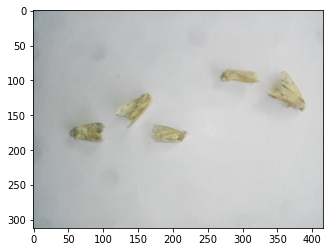

In [ ]:
plt.imshow(re_size)

In [ ]:
#

yolo = cv2.dnn.readNet("./yolov3-tiny.weights", "./yolov3-tiny.cfg")


In [ ]:
classes = []

with open("./coco.txt", 'r') as f:
  classes = f.read().splitlines()

In [ ]:
classes

['person',
 'bicycle',
 'car',
 'motorbike',
 'aeroplane',
 'bus',
 'train',
 'truck',
 'boat',
 'traffic light',
 'fire hydrant',
 'stop sign',
 'parking meter',
 'bench',
 'bird',
 'cat',
 'dog',
 'horse',
 'sheep',
 'cow',
 'elephant',
 'bear',
 'zebra',
 'giraffe',
 'backpack',
 'umbrella',
 'handbag',
 'tie',
 'suitcase',
 'frisbee',
 'skis',
 'snowboard',
 'sports ball',
 'kite',
 'baseball bat',
 'baseball glove',
 'skateboard',
 'surfboard',
 'tennis racket',
 'bottle',
 'wine glass',
 'cup',
 'fork',
 'knife',
 'spoon',
 'bowl',
 'banana',
 'apple',
 'sandwich',
 'orange',
 'broccoli',
 'carrot',
 'hot dog',
 'pizza',
 'donut',
 'cake',
 'chair',
 'sofa',
 'pottedplant',
 'bed',
 'diningtable',
 'toilet',
 'tvmonitor',
 'laptop',
 'mouse',
 'remote',
 'keyboard',
 'cell phone',
 'microwave',
 'oven',
 'toaster',
 'sink',
 'refrigerator',
 'book',
 'clock',
 'vase',
 'scissors',
 'teddy bear',
 'hair drier',
 'toothbrush']

In [ ]:
img = cv2.